In [1]:
import numpy as np
import pandas as pd


import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt


VOC_SIZE = 7881
max_length_sequence = 100

np.random.seed(1)

In [2]:
#importing previously preprocessed and vectorized dataset from preprocessing notebook as pickle file


x = np.load('data.npy')
word_mat = np.load('word_mat.npy')

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(VOC_SIZE, 100, input_length=max_length_sequence, weights = [word_mat], trainable=False))


model.add(tf.keras.layers.Conv1D(kernel_size = 3, filters = 250, activation = "relu"))
model.add(tf.keras.layers.MaxPooling1D())


model.add(tf.keras.layers.Dense(20, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))



model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics =["acc"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          788100    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 250)           75250     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 250)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 49, 20)            5020      
_________________________________________________________________
dropout_2 (Dropout)          (None, 49, 20)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 49, 10)            210       
_________________________________________________________________
dropout_3 (Dropout)          (None, 49, 10)           

In [ ]:
# checkpoint_cb = keras.callbacks.ModelCheckpoint("model-{epoch:02d}.h5", save_best_only=True)

In [5]:
y = np.load("y.npy")

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
history = model.fit(X_train, y_train, epochs = 10, batch_size=16, validation_split=0.25)

Epoch 1/10
209/209 [==============================] - 8s 15ms/step - loss: 0.4844 - acc: 0.8547 - val_loss: 0.3704 - val_acc: 0.8802
Epoch 2/10
209/209 [==============================] - 3s 13ms/step - loss: 0.4298 - acc: 0.8648 - val_loss: 0.3608 - val_acc: 0.8830
Epoch 3/10
209/209 [==============================] - 3s 14ms/step - loss: 0.4169 - acc: 0.8675 - val_loss: 0.3650 - val_acc: 0.8834
Epoch 4/10
209/209 [==============================] - 3s 13ms/step - loss: 0.4074 - acc: 0.8694 - val_loss: 0.3669 - val_acc: 0.8841
Epoch 5/10
209/209 [==============================] - 3s 14ms/step - loss: 0.4012 - acc: 0.8702 - val_loss: 0.3632 - val_acc: 0.8851
Epoch 6/10
209/209 [==============================] - 3s 13ms/step - loss: 0.3964 - acc: 0.8714 - val_loss: 0.3565 - val_acc: 0.8849
Epoch 7/10
209/209 [==============================] - 3s 16ms/step - loss: 0.3913 - acc: 0.8728 - val_loss: 0.3534 - val_acc: 0.8856
Epoch 8/10
209/209 [==============================] - 3s 15ms/step - 

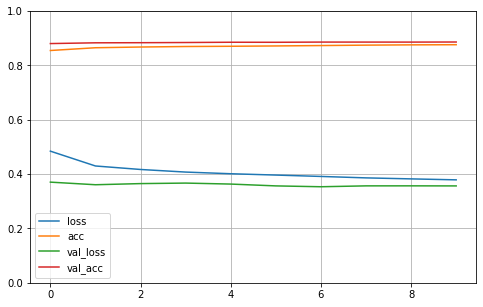

In [8]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
model.evaluate(X_test, y_test)

35/35 [==============================] - 0s 9ms/step - loss: 0.3534 - acc: 0.8874


[0.35342562198638916, 0.8873799443244934]